In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Leo la data

In [3]:
train = pd.read_csv('titanic_train.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
#Veo los datos que faltan

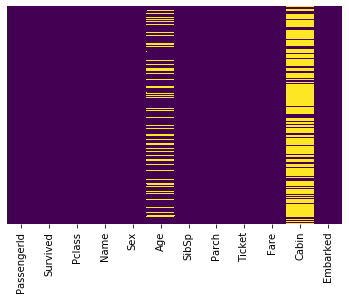

In [8]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
#ALgunas visualizaciones para entender la data 

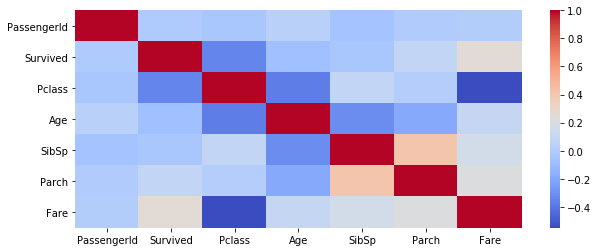

In [10]:
plt.figure(figsize=(10,4))
sns.heatmap(train.corr(),cmap='coolwarm')

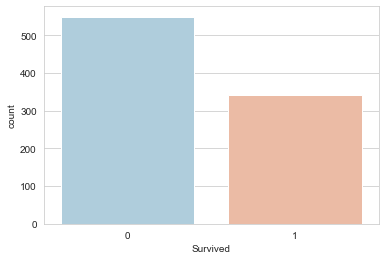

In [11]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

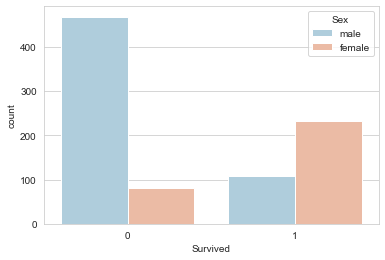

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

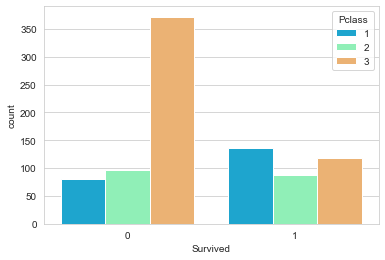

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

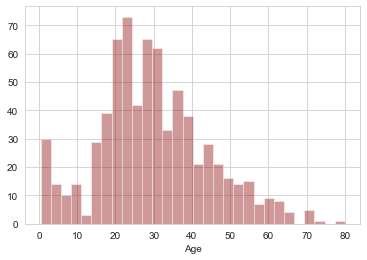

In [14]:
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

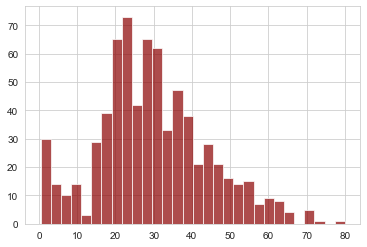

In [15]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

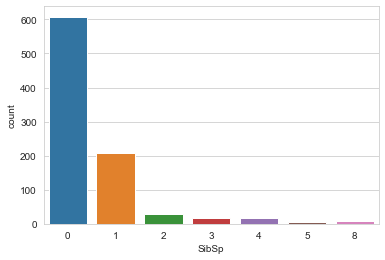

In [16]:
sns.countplot(x='SibSp',data=train)

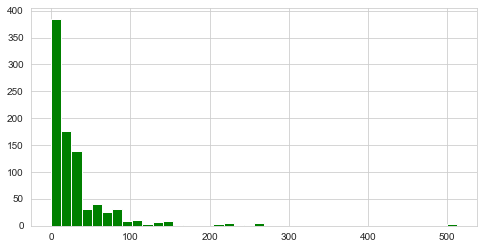

In [17]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

In [18]:
#trabajo con los valores que no estan en el df

In [19]:
#EDAD 

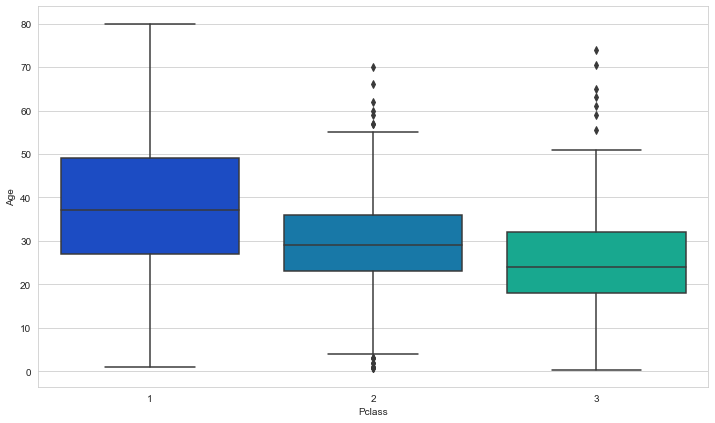

In [20]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [21]:
#Remplazos las edades faltantes por el promedio de la edad de la clase a la que pertenecen

In [22]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [23]:
train[train['Pclass'] == 1]['Age'].mean()//1

38.0

In [24]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    Class_one_age = train[train['Pclass'] == 1]['Age'].mean()//1
    Class_two_age = train[train['Pclass'] == 2]['Age'].mean()//1
    Class_three_age = train[train['Pclass'] == 3]['Age'].mean()//1
    
    if pd.isnull(Age):

        if Pclass == 1:
            return Class_one_age

        elif Pclass == 2:
            return Class_two_age

        else:
            return Class_three_age

    else:
        return Age

In [25]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

In [26]:
#Veo si funciono la funcion

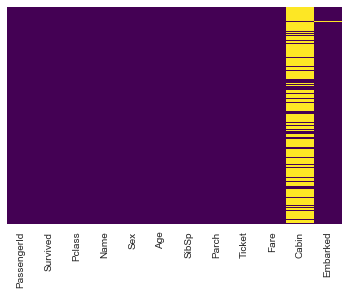

In [27]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [28]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [29]:
#Me falta trabajar la columba de Cabin y los 2 datos que faltan de Embarked

In [30]:
#Por el momento voy a dropear la columna de Cabin y las 2 filas donde el Embarked es Null

In [31]:
train.drop('Cabin',axis=1,inplace=True)

In [32]:
train.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


In [33]:
train.dropna(inplace=True)

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [35]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [36]:
#Ahora con el Dataframe sin Nulls convierto las features de categorias con get_dummies

In [37]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [38]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [39]:
#Por el momento dropeo las columnas de, Name y ticket ya que no son tan releavntes
# y las columnas que acabo de transformar

In [40]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [41]:
#Agrego las features categoricas al Dataframe

In [42]:
train = pd.concat([train,sex,embark],axis=1)

In [43]:
train.drop('PassengerId', axis = 1 , inplace = True)

In [44]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [45]:
#Ya con el DF listo, lo divido en train y test

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [49]:
#Implemento un modelo de Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\fonta\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
predictions = logmodel.predict(X_test)

In [53]:
# Evaluo el modelo

In [54]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [55]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       163
           1       0.84      0.70      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.82       267
weighted avg       0.83      0.83      0.83       267



In [56]:
confusion_matrix(y_test,predictions)

array([[149,  14],
       [ 31,  73]], dtype=int64)

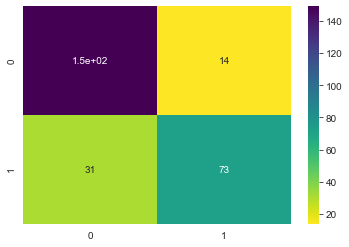

In [57]:
sns.heatmap(confusion_matrix(y_test,predictions) , cmap='viridis_r', annot=True)

In [58]:
#decision Tree

In [59]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(min_samples_split=5, min_samples_leaf=10)

In [60]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [61]:
predictions = dtree.predict(X_test)

In [62]:
from sklearn.metrics import classification_report,confusion_matrix


In [63]:
print(classification_report(y_test,predictions))
print()
confusion_matrix(y_test,predictions)

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       163
           1       0.81      0.76      0.79       104

    accuracy                           0.84       267
   macro avg       0.83      0.82      0.83       267
weighted avg       0.84      0.84      0.84       267




array([[145,  18],
       [ 25,  79]], dtype=int64)

In [64]:
#Correlacion Feature con Label

In [65]:
dtree.feature_importances_

array([0.12343366, 0.11630293, 0.05678393, 0.03798426, 0.14279996,
       0.50830066, 0.        , 0.0143946 ])

In [66]:
imp = dtree.feature_importances_
df_imp = pd.DataFrame({'Feature': X_train.columns , 'Importance': imp})
df_imp = df_imp.sort_values('Importance', ascending=False)[:10]
df_imp

,Feature,Importance
5,male,0.508301
4,Fare,0.142800
0,Pclass,0.123434
1,Age,0.116303
2,SibSp,0.056784
3,Parch,0.037984
7,S,0.014395
6,Q,0.000000


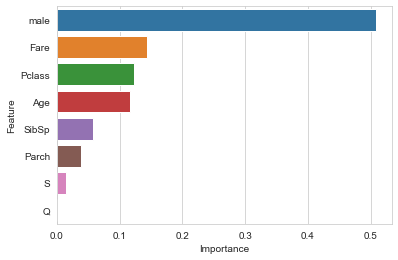

In [67]:
sns.barplot(x='Importance', y='Feature', data=df_imp)

In [68]:
#SVM

In [69]:

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [70]:
svc = SVC()

In [71]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf'] , 'degree': [0,1,2,3,4,5,6] } 

In [72]:
grid = GridSearchCV(SVC() , param_grid , refit=True, verbose=3 )

In [73]:
grid.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'degree': [0, 1, 2, 3, 4, 5, 6],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)>

In [74]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 175 candidates, totalling 875 fits
[CV] C=0.1, degree=0, gamma=1, kernel=rbf ............................
[CV]  C=0.1, degree=0, gamma=1, kernel=rbf, score=0.624, total=   0.0s
[CV] C=0.1, degree=0, gamma=1, kernel=rbf ............................
[CV]  C=0.1, degree=0, gamma=1, kernel=rbf, score=0.616, total=   0.0s
[CV] C=0.1, degree=0, gamma=1, kernel=rbf ............................
[CV]  C=0.1, degree=0, gamma=1, kernel=rbf, score=0.621, total=   0.0s
[CV] C=0.1, degree=0, gamma=1, kernel=rbf ............................
[CV]  C=0.1, degree=0, gamma=1, kernel=rbf, score=0.621, total=   0.0s
[CV] C=0.1, degree=0, gamma=1, kernel=rbf ............................
[CV]  C=0.1, degree=0, gamma=1, kernel=rbf, score=0.621, total=   0.0s
[CV] C=0.1, degree=0, gamma=0.1, kernel=rbf ..........................
[CV]  C=0.1, degree=0, gamma=0.1, kernel=rbf, score=0.624, total=   0.0s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, degree=0, gamma=0.1, kernel=rbf ..........................
[CV]  C=0.1, degree=0, gamma=0.1, kernel=rbf, score=0.616, total=   0.0s
[CV] C=0.1, degree=0, gamma=0.1, kernel=rbf ..........................
[CV]  C=0.1, degree=0, gamma=0.1, kernel=rbf, score=0.621, total=   0.0s
[CV] C=0.1, degree=0, gamma=0.1, kernel=rbf ..........................
[CV]  C=0.1, degree=0, gamma=0.1, kernel=rbf, score=0.621, total=   0.0s
[CV] C=0.1, degree=0, gamma=0.1, kernel=rbf ..........................
[CV]  C=0.1, degree=0, gamma=0.1, kernel=rbf, score=0.621, total=   0.0s
[CV] C=0.1, degree=0, gamma=0.01, kernel=rbf .........................
[CV]  C=0.1, degree=0, gamma=0.01, kernel=rbf, score=0.664, total=   0.0s
[CV] C=0.1, degree=0, gamma=0.01, kernel=rbf .........................
[CV]  C=0.1, degree=0, gamma=0.01, kernel=rbf, score=0.632, total=   0.0s
[CV] C=0.1, degree=0, gamma=0.01, kernel=rbf .........................
[CV]  C=0.1, degree=0, gamma=0.01, kernel=rbf, score=0.653, to

[CV]  C=0.1, degree=2, gamma=0.001, kernel=rbf, score=0.710, total=   0.0s
[CV] C=0.1, degree=2, gamma=0.001, kernel=rbf ........................
[CV]  C=0.1, degree=2, gamma=0.001, kernel=rbf, score=0.669, total=   0.0s
[CV] C=0.1, degree=2, gamma=0.0001, kernel=rbf .......................
[CV]  C=0.1, degree=2, gamma=0.0001, kernel=rbf, score=0.640, total=   0.0s
[CV] C=0.1, degree=2, gamma=0.0001, kernel=rbf .......................
[CV]  C=0.1, degree=2, gamma=0.0001, kernel=rbf, score=0.712, total=   0.0s
[CV] C=0.1, degree=2, gamma=0.0001, kernel=rbf .......................
[CV]  C=0.1, degree=2, gamma=0.0001, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, degree=2, gamma=0.0001, kernel=rbf .......................
[CV]  C=0.1, degree=2, gamma=0.0001, kernel=rbf, score=0.694, total=   0.0s
[CV] C=0.1, degree=2, gamma=0.0001, kernel=rbf .......................
[CV]  C=0.1, degree=2, gamma=0.0001, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, degree=3, gamma=1, kernel=rbf ..

[CV]  C=0.1, degree=4, gamma=0.0001, kernel=rbf, score=0.637, total=   0.0s
[CV] C=0.1, degree=5, gamma=1, kernel=rbf ............................
[CV]  C=0.1, degree=5, gamma=1, kernel=rbf, score=0.624, total=   0.0s
[CV] C=0.1, degree=5, gamma=1, kernel=rbf ............................
[CV]  C=0.1, degree=5, gamma=1, kernel=rbf, score=0.616, total=   0.0s
[CV] C=0.1, degree=5, gamma=1, kernel=rbf ............................
[CV]  C=0.1, degree=5, gamma=1, kernel=rbf, score=0.621, total=   0.0s
[CV] C=0.1, degree=5, gamma=1, kernel=rbf ............................
[CV]  C=0.1, degree=5, gamma=1, kernel=rbf, score=0.621, total=   0.0s
[CV] C=0.1, degree=5, gamma=1, kernel=rbf ............................
[CV]  C=0.1, degree=5, gamma=1, kernel=rbf, score=0.621, total=   0.0s
[CV] C=0.1, degree=5, gamma=0.1, kernel=rbf ..........................
[CV]  C=0.1, degree=5, gamma=0.1, kernel=rbf, score=0.624, total=   0.0s
[CV] C=0.1, degree=5, gamma=0.1, kernel=rbf ..........................

[CV] C=1, degree=0, gamma=0.01, kernel=rbf ...........................
[CV]  C=1, degree=0, gamma=0.01, kernel=rbf, score=0.710, total=   0.0s
[CV] C=1, degree=0, gamma=0.001, kernel=rbf ..........................
[CV]  C=1, degree=0, gamma=0.001, kernel=rbf, score=0.664, total=   0.0s
[CV] C=1, degree=0, gamma=0.001, kernel=rbf ..........................
[CV]  C=1, degree=0, gamma=0.001, kernel=rbf, score=0.776, total=   0.0s
[CV] C=1, degree=0, gamma=0.001, kernel=rbf ..........................
[CV]  C=1, degree=0, gamma=0.001, kernel=rbf, score=0.661, total=   0.0s
[CV] C=1, degree=0, gamma=0.001, kernel=rbf ..........................
[CV]  C=1, degree=0, gamma=0.001, kernel=rbf, score=0.718, total=   0.0s
[CV] C=1, degree=0, gamma=0.001, kernel=rbf ..........................
[CV]  C=1, degree=0, gamma=0.001, kernel=rbf, score=0.710, total=   0.0s
[CV] C=1, degree=0, gamma=0.0001, kernel=rbf .........................
[CV]  C=1, degree=0, gamma=0.0001, kernel=rbf, score=0.664, total=

[CV]  C=1, degree=2, gamma=0.0001, kernel=rbf, score=0.669, total=   0.0s
[CV] C=1, degree=3, gamma=1, kernel=rbf ..............................
[CV] .. C=1, degree=3, gamma=1, kernel=rbf, score=0.632, total=   0.0s
[CV] C=1, degree=3, gamma=1, kernel=rbf ..............................
[CV] .. C=1, degree=3, gamma=1, kernel=rbf, score=0.664, total=   0.0s
[CV] C=1, degree=3, gamma=1, kernel=rbf ..............................
[CV] .. C=1, degree=3, gamma=1, kernel=rbf, score=0.653, total=   0.0s
[CV] C=1, degree=3, gamma=1, kernel=rbf ..............................
[CV] .. C=1, degree=3, gamma=1, kernel=rbf, score=0.677, total=   0.0s
[CV] C=1, degree=3, gamma=1, kernel=rbf ..............................
[CV] .. C=1, degree=3, gamma=1, kernel=rbf, score=0.685, total=   0.0s
[CV] C=1, degree=3, gamma=0.1, kernel=rbf ............................
[CV]  C=1, degree=3, gamma=0.1, kernel=rbf, score=0.664, total=   0.0s
[CV] C=1, degree=3, gamma=0.1, kernel=rbf ............................
[CV

[CV]  C=1, degree=5, gamma=0.01, kernel=rbf, score=0.685, total=   0.0s
[CV] C=1, degree=5, gamma=0.01, kernel=rbf ...........................
[CV]  C=1, degree=5, gamma=0.01, kernel=rbf, score=0.726, total=   0.0s
[CV] C=1, degree=5, gamma=0.01, kernel=rbf ...........................
[CV]  C=1, degree=5, gamma=0.01, kernel=rbf, score=0.710, total=   0.0s
[CV] C=1, degree=5, gamma=0.001, kernel=rbf ..........................
[CV]  C=1, degree=5, gamma=0.001, kernel=rbf, score=0.664, total=   0.0s
[CV] C=1, degree=5, gamma=0.001, kernel=rbf ..........................
[CV]  C=1, degree=5, gamma=0.001, kernel=rbf, score=0.776, total=   0.0s
[CV] C=1, degree=5, gamma=0.001, kernel=rbf ..........................
[CV]  C=1, degree=5, gamma=0.001, kernel=rbf, score=0.661, total=   0.0s
[CV] C=1, degree=5, gamma=0.001, kernel=rbf ..........................
[CV]  C=1, degree=5, gamma=0.001, kernel=rbf, score=0.718, total=   0.0s
[CV] C=1, degree=5, gamma=0.001, kernel=rbf ......................

[CV]  C=10, degree=0, gamma=0.0001, kernel=rbf, score=0.648, total=   0.0s
[CV] C=10, degree=0, gamma=0.0001, kernel=rbf ........................
[CV]  C=10, degree=0, gamma=0.0001, kernel=rbf, score=0.752, total=   0.0s
[CV] C=10, degree=0, gamma=0.0001, kernel=rbf ........................
[CV]  C=10, degree=0, gamma=0.0001, kernel=rbf, score=0.661, total=   0.0s
[CV] C=10, degree=0, gamma=0.0001, kernel=rbf ........................
[CV]  C=10, degree=0, gamma=0.0001, kernel=rbf, score=0.710, total=   0.0s
[CV] C=10, degree=0, gamma=0.0001, kernel=rbf ........................
[CV]  C=10, degree=0, gamma=0.0001, kernel=rbf, score=0.661, total=   0.0s
[CV] C=10, degree=1, gamma=1, kernel=rbf .............................
[CV] . C=10, degree=1, gamma=1, kernel=rbf, score=0.600, total=   0.0s
[CV] C=10, degree=1, gamma=1, kernel=rbf .............................
[CV] . C=10, degree=1, gamma=1, kernel=rbf, score=0.656, total=   0.0s
[CV] C=10, degree=1, gamma=1, kernel=rbf ................

[CV] . C=10, degree=3, gamma=1, kernel=rbf, score=0.637, total=   0.0s
[CV] C=10, degree=3, gamma=1, kernel=rbf .............................
[CV] . C=10, degree=3, gamma=1, kernel=rbf, score=0.694, total=   0.0s
[CV] C=10, degree=3, gamma=1, kernel=rbf .............................
[CV] . C=10, degree=3, gamma=1, kernel=rbf, score=0.702, total=   0.0s
[CV] C=10, degree=3, gamma=0.1, kernel=rbf ...........................
[CV]  C=10, degree=3, gamma=0.1, kernel=rbf, score=0.632, total=   0.0s
[CV] C=10, degree=3, gamma=0.1, kernel=rbf ...........................
[CV]  C=10, degree=3, gamma=0.1, kernel=rbf, score=0.728, total=   0.0s
[CV] C=10, degree=3, gamma=0.1, kernel=rbf ...........................
[CV]  C=10, degree=3, gamma=0.1, kernel=rbf, score=0.661, total=   0.0s
[CV] C=10, degree=3, gamma=0.1, kernel=rbf ...........................
[CV]  C=10, degree=3, gamma=0.1, kernel=rbf, score=0.702, total=   0.0s
[CV] C=10, degree=3, gamma=0.1, kernel=rbf ...........................
[C

[CV]  C=10, degree=5, gamma=0.001, kernel=rbf, score=0.718, total=   0.0s
[CV] C=10, degree=5, gamma=0.0001, kernel=rbf ........................
[CV]  C=10, degree=5, gamma=0.0001, kernel=rbf, score=0.648, total=   0.0s
[CV] C=10, degree=5, gamma=0.0001, kernel=rbf ........................
[CV]  C=10, degree=5, gamma=0.0001, kernel=rbf, score=0.752, total=   0.0s
[CV] C=10, degree=5, gamma=0.0001, kernel=rbf ........................
[CV]  C=10, degree=5, gamma=0.0001, kernel=rbf, score=0.661, total=   0.0s
[CV] C=10, degree=5, gamma=0.0001, kernel=rbf ........................
[CV]  C=10, degree=5, gamma=0.0001, kernel=rbf, score=0.710, total=   0.0s
[CV] C=10, degree=5, gamma=0.0001, kernel=rbf ........................
[CV]  C=10, degree=5, gamma=0.0001, kernel=rbf, score=0.661, total=   0.0s
[CV] C=10, degree=6, gamma=1, kernel=rbf .............................
[CV] . C=10, degree=6, gamma=1, kernel=rbf, score=0.600, total=   0.0s
[CV] C=10, degree=6, gamma=1, kernel=rbf .............

[CV]  C=100, degree=1, gamma=1, kernel=rbf, score=0.637, total=   0.0s
[CV] C=100, degree=1, gamma=1, kernel=rbf ............................
[CV]  C=100, degree=1, gamma=1, kernel=rbf, score=0.694, total=   0.0s
[CV] C=100, degree=1, gamma=1, kernel=rbf ............................
[CV]  C=100, degree=1, gamma=1, kernel=rbf, score=0.694, total=   0.0s
[CV] C=100, degree=1, gamma=0.1, kernel=rbf ..........................
[CV]  C=100, degree=1, gamma=0.1, kernel=rbf, score=0.656, total=   0.0s
[CV] C=100, degree=1, gamma=0.1, kernel=rbf ..........................
[CV]  C=100, degree=1, gamma=0.1, kernel=rbf, score=0.664, total=   0.0s
[CV] C=100, degree=1, gamma=0.1, kernel=rbf ..........................
[CV]  C=100, degree=1, gamma=0.1, kernel=rbf, score=0.694, total=   0.0s
[CV] C=100, degree=1, gamma=0.1, kernel=rbf ..........................
[CV]  C=100, degree=1, gamma=0.1, kernel=rbf, score=0.661, total=   0.0s
[CV] C=100, degree=1, gamma=0.1, kernel=rbf .........................

[CV]  C=100, degree=3, gamma=0.01, kernel=rbf, score=0.672, total=   0.0s
[CV] C=100, degree=3, gamma=0.01, kernel=rbf .........................
[CV]  C=100, degree=3, gamma=0.01, kernel=rbf, score=0.752, total=   0.0s
[CV] C=100, degree=3, gamma=0.01, kernel=rbf .........................
[CV]  C=100, degree=3, gamma=0.01, kernel=rbf, score=0.726, total=   0.0s
[CV] C=100, degree=3, gamma=0.01, kernel=rbf .........................
[CV]  C=100, degree=3, gamma=0.01, kernel=rbf, score=0.718, total=   0.0s
[CV] C=100, degree=3, gamma=0.01, kernel=rbf .........................
[CV]  C=100, degree=3, gamma=0.01, kernel=rbf, score=0.790, total=   0.0s
[CV] C=100, degree=3, gamma=0.001, kernel=rbf ........................
[CV]  C=100, degree=3, gamma=0.001, kernel=rbf, score=0.712, total=   0.0s
[CV] C=100, degree=3, gamma=0.001, kernel=rbf ........................
[CV]  C=100, degree=3, gamma=0.001, kernel=rbf, score=0.800, total=   0.0s
[CV] C=100, degree=3, gamma=0.001, kernel=rbf ........

[CV]  C=100, degree=5, gamma=0.001, kernel=rbf, score=0.782, total=   0.0s
[CV] C=100, degree=5, gamma=0.001, kernel=rbf ........................
[CV]  C=100, degree=5, gamma=0.001, kernel=rbf, score=0.766, total=   0.0s
[CV] C=100, degree=5, gamma=0.001, kernel=rbf ........................
[CV]  C=100, degree=5, gamma=0.001, kernel=rbf, score=0.831, total=   0.0s
[CV] C=100, degree=5, gamma=0.0001, kernel=rbf .......................
[CV]  C=100, degree=5, gamma=0.0001, kernel=rbf, score=0.704, total=   0.0s
[CV] C=100, degree=5, gamma=0.0001, kernel=rbf .......................
[CV]  C=100, degree=5, gamma=0.0001, kernel=rbf, score=0.816, total=   0.0s
[CV] C=100, degree=5, gamma=0.0001, kernel=rbf .......................
[CV]  C=100, degree=5, gamma=0.0001, kernel=rbf, score=0.677, total=   0.0s
[CV] C=100, degree=5, gamma=0.0001, kernel=rbf .......................
[CV]  C=100, degree=5, gamma=0.0001, kernel=rbf, score=0.758, total=   0.0s
[CV] C=100, degree=5, gamma=0.0001, kernel=rb

[CV]  C=1000, degree=0, gamma=0.0001, kernel=rbf, score=0.839, total=   0.0s
[CV] C=1000, degree=1, gamma=1, kernel=rbf ...........................
[CV]  C=1000, degree=1, gamma=1, kernel=rbf, score=0.600, total=   0.0s
[CV] C=1000, degree=1, gamma=1, kernel=rbf ...........................
[CV]  C=1000, degree=1, gamma=1, kernel=rbf, score=0.648, total=   0.0s
[CV] C=1000, degree=1, gamma=1, kernel=rbf ...........................
[CV]  C=1000, degree=1, gamma=1, kernel=rbf, score=0.645, total=   0.0s
[CV] C=1000, degree=1, gamma=1, kernel=rbf ...........................
[CV]  C=1000, degree=1, gamma=1, kernel=rbf, score=0.685, total=   0.0s
[CV] C=1000, degree=1, gamma=1, kernel=rbf ...........................
[CV]  C=1000, degree=1, gamma=1, kernel=rbf, score=0.669, total=   0.0s
[CV] C=1000, degree=1, gamma=0.1, kernel=rbf .........................
[CV]  C=1000, degree=1, gamma=0.1, kernel=rbf, score=0.648, total=   0.0s
[CV] C=1000, degree=1, gamma=0.1, kernel=rbf ..................

[CV]  C=1000, degree=3, gamma=0.1, kernel=rbf, score=0.656, total=   0.0s
[CV] C=1000, degree=3, gamma=0.1, kernel=rbf .........................
[CV]  C=1000, degree=3, gamma=0.1, kernel=rbf, score=0.694, total=   0.0s
[CV] C=1000, degree=3, gamma=0.1, kernel=rbf .........................
[CV]  C=1000, degree=3, gamma=0.1, kernel=rbf, score=0.677, total=   0.0s
[CV] C=1000, degree=3, gamma=0.1, kernel=rbf .........................
[CV]  C=1000, degree=3, gamma=0.1, kernel=rbf, score=0.750, total=   0.1s
[CV] C=1000, degree=3, gamma=0.01, kernel=rbf ........................
[CV]  C=1000, degree=3, gamma=0.01, kernel=rbf, score=0.664, total=   0.1s
[CV] C=1000, degree=3, gamma=0.01, kernel=rbf ........................
[CV]  C=1000, degree=3, gamma=0.01, kernel=rbf, score=0.760, total=   0.1s
[CV] C=1000, degree=3, gamma=0.01, kernel=rbf ........................
[CV]  C=1000, degree=3, gamma=0.01, kernel=rbf, score=0.726, total=   0.1s
[CV] C=1000, degree=3, gamma=0.01, kernel=rbf .......

[CV]  C=1000, degree=5, gamma=0.01, kernel=rbf, score=0.734, total=   0.1s
[CV] C=1000, degree=5, gamma=0.01, kernel=rbf ........................
[CV]  C=1000, degree=5, gamma=0.01, kernel=rbf, score=0.815, total=   0.1s
[CV] C=1000, degree=5, gamma=0.001, kernel=rbf .......................
[CV]  C=1000, degree=5, gamma=0.001, kernel=rbf, score=0.720, total=   0.1s
[CV] C=1000, degree=5, gamma=0.001, kernel=rbf .......................
[CV]  C=1000, degree=5, gamma=0.001, kernel=rbf, score=0.776, total=   0.1s
[CV] C=1000, degree=5, gamma=0.001, kernel=rbf .......................
[CV]  C=1000, degree=5, gamma=0.001, kernel=rbf, score=0.806, total=   0.1s
[CV] C=1000, degree=5, gamma=0.001, kernel=rbf .......................
[CV]  C=1000, degree=5, gamma=0.001, kernel=rbf, score=0.766, total=   0.1s
[CV] C=1000, degree=5, gamma=0.001, kernel=rbf .......................
[CV]  C=1000, degree=5, gamma=0.001, kernel=rbf, score=0.815, total=   0.1s
[CV] C=1000, degree=5, gamma=0.0001, kernel=

[Parallel(n_jobs=1)]: Done 875 out of 875 | elapsed:   26.4s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'degree': [0, 1, 2, 3, 4, 5, 6],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [75]:
grid.best_params_

{'C': 100, 'degree': 0, 'gamma': 0.001, 'kernel': 'rbf'}

In [76]:
grid_predictions = grid.predict(X_test)

In [77]:
print(classification_report(y_test,grid_predictions))
print('///////////////////////')
confusion_matrix(y_test,grid_predictions)

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       163
           1       0.74      0.75      0.74       104

    accuracy                           0.80       267
   macro avg       0.79      0.79      0.79       267
weighted avg       0.80      0.80      0.80       267

///////////////////////


array([[135,  28],
       [ 26,  78]], dtype=int64)

In [78]:
#NN

In [79]:
X_test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
511,3,25.0,0,0,8.05,1,0,1
613,3,25.0,0,0,7.75,1,1,0
615,2,24.0,1,2,65.00,0,0,1
337,1,41.0,0,0,134.50,0,0,0
718,3,25.0,0,0,15.50,1,1,0


In [80]:
X_test.to_csv('X_test.csv')
X_train.to_csv('X_train.csv')
y_test.to_csv('y_test.csv')
y_train.to_csv('y_train.csv')

In [81]:
https://colab.research.google.com/drive/1HCHNIhbAkw-dHIPUa2eOzFR_e2sd6Me7#scrollTo=CnaiqimVOFUy

SyntaxError: invalid syntax (<ipython-input-81-0c8e8f546a58>, line 1)